# Practical tasks

##### Please explore the datasets and answer the questions below.
##### Here are some guidlines and advices you should consider:
* you can add as many cells as is comfortable for you for each answer
* some questions require your explanation. Add a cell and choose a markdown option in the menu 
* when you are making plots, please add labels to the axes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
from sklearn.cluster import KMeans
# you will need to import more libraries as needed

# Clustering tasks

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

The dataset for this problem `shopping-data.csv`

#### 1. Load the data and preview

In [2]:
customer_data = pd.read_csv('shopping-data.csv')

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 2. Plot scatter plot for annual income and spending score which will be used for clustering in the next steps

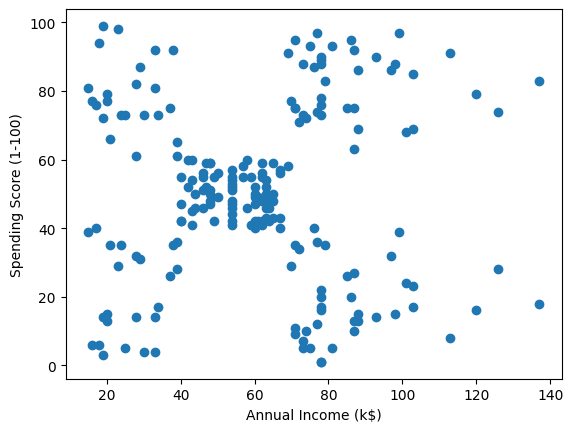

In [5]:
# <your code here>
plt.Figure(figsize=(6,5))
plt.scatter(customer_data["Annual Income (k$)"], customer_data["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### 3. Normalize the data

In [12]:
# <your code here>
x_shop = customer_data[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler_shop = StandardScaler()
x_shop_scaled = scaler_shop.fit_transform(x_shop)

#### 4. Use Elbow method to decide number of clusters

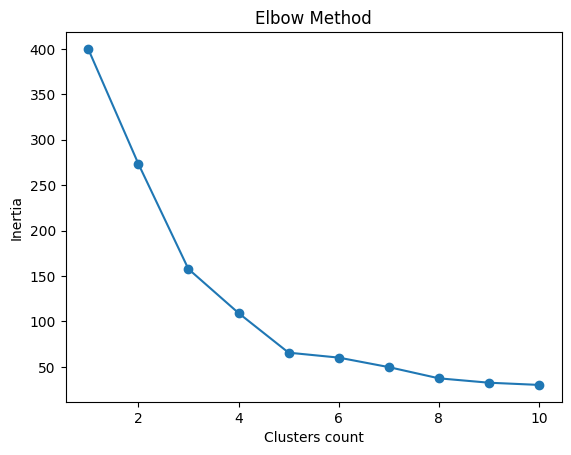

In [18]:
# <your code here>
inerties = []
k_value = range(1, 11)

for k in k_value:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_shop_scaled)
    inerties.append(km.inertia_)

plt.Figure(figsize=(6, 4))
plt.plot(k_value, inerties, marker="o")
plt.xlabel("Clusters count")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

#### 5. Perform Clustering using KMeans

In [14]:
# <your code here>
kmeans_shop = KMeans(n_clusters=5, random_state=42)
shop_lable = kmeans_shop.fit_predict(x_shop_scaled)

#### 6. Plot scatter plot and color code in clustered groups

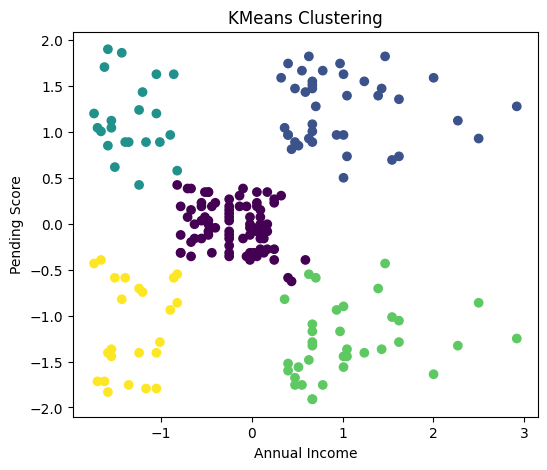

In [16]:
# <your code here>
plt.figure(figsize=(6, 5))
plt.scatter(x_shop_scaled[:, 0], x_shop_scaled[:, 1], c=shop_lable, cmap="viridis")
plt.xlabel("Annual Income")
plt.ylabel("Pending Score")
plt.title("KMeans Clustering")
plt.show()

#### 7. Plot dendrogram to decide number of clusters for Hierarchical Clustering. <br> Explain (free text in a markdown cell) what is the optimal number of clusters and why

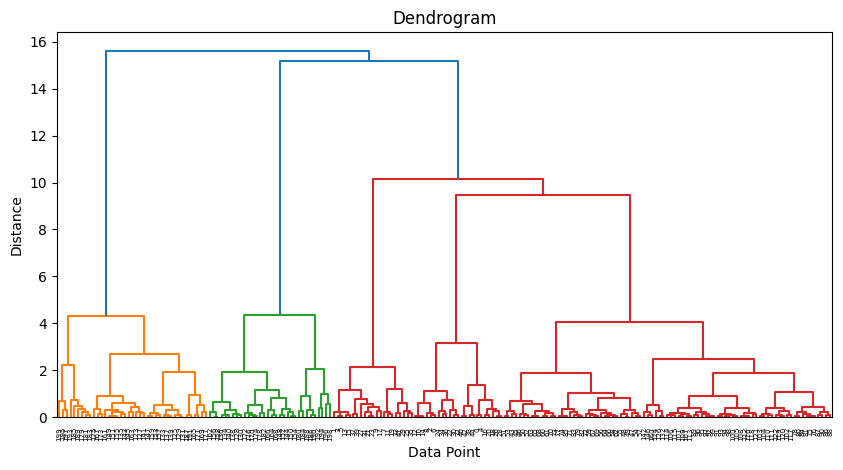

In [19]:
# <your code here>
from scipy.cluster.hierarchy import dendrogram, linkage

z= linkage(x_shop_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(z)

plt.title("Dendrogram")
plt.xlabel("Data Point")
plt.ylabel("Distance")
plt.show()

The optimal number of clusters arount 3 because there is a jump in distance after the data splits into main 3 groups

#### 8. Do clustering using Hierarchical Clustering

In [20]:
# <your code here>

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
hc_labels = hc.fit_predict(x_shop_scaled)

#### 9. Plot scatter plot and color code in clustered groups

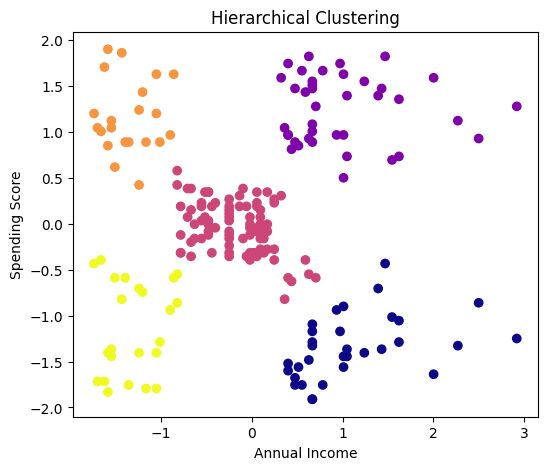

In [22]:
# <your code here>
plt.figure(figsize=(6, 5))
plt.scatter(x_shop_scaled[:, 0], x_shop_scaled[:, 1], c=hc_labels, cmap="plasma")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Hierarchical Clustering")
plt.show()

####  10. Do KMeans and DBSCAN clustering on this data

In [23]:
from sklearn.datasets import make_moons
#moons_X: Data, moon_y: Labels
moons_X, moon_y = make_moons(n_samples=2000)

Text(0.5, 1.0, 'Half Moons')

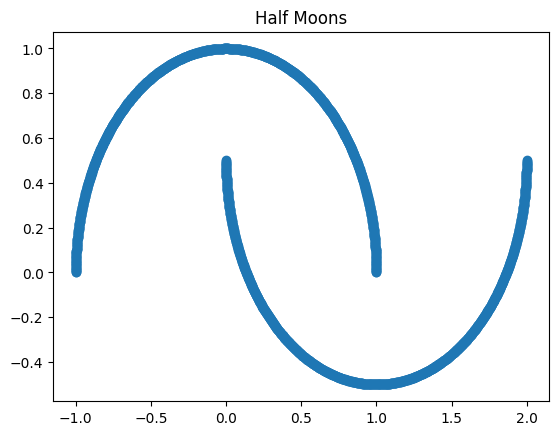

In [24]:
plt.scatter(moons_X[:,0],moons_X[:,1])
plt.title('Half Moons')

#### Using KMeans (do clustering and plot results (each cluster in own color))

In [27]:
# <your code here>
kmeans_moons = KMeans(n_clusters=2, random_state=42)
moons_km_labels = kmeans_moons.fit_predict(moons_X)

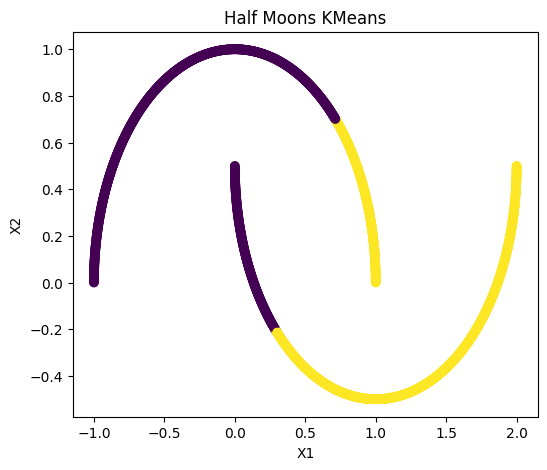

In [28]:
# <your code here>
plt.figure(figsize=(6, 5))
plt.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_km_labels, cmap="viridis")
plt.title("Half Moons KMeans")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#### 11. Using DBSCAN do clustering and plot results (each cluster in own color). Find the most suitable eps and minimal samples number

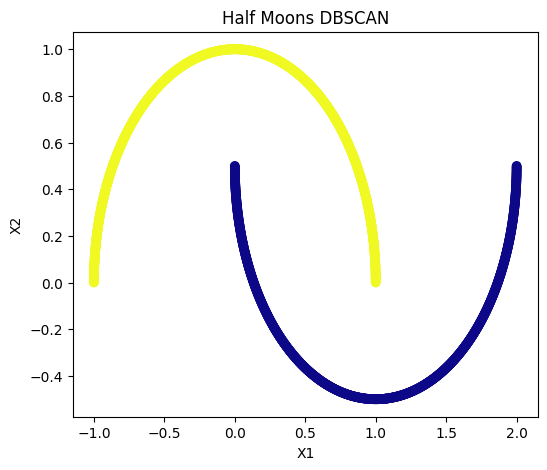

In [29]:
# <your code here>
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
moons_db_labels = dbscan.fit_predict(moons_X)

plt.figure(figsize=(6, 5))
plt.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_db_labels, cmap="plasma")
plt.title("Half Moons DBSCAN")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


#### 12. Compare the results of K-means and DBSCAN clustering
Explain why one or another is prefferable for such dataset, and differences if any.

KMeans not well perform on half moons dataset because it assume clusters are circular and KMeans splits them incorrectly

DBSCAN perform better because it can detect non linear shapes and correctly separates two moon clusters

### Perform PCA on penguins :)
###### This section uses kaggle dataset (https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data)
###### The tasks below include data analysis, data preprocessing, PCA, and application of classification to predict the target

#### 13. Describe the data. Do any additional exporations as you feel

In [30]:
# Dataset
penguins = pd.read_csv('penguins.csv')
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [33]:
# decribe the data, its size
# <your code here>
print("Shape: ", penguins.shape)
penguins.info()
penguins.describe()

Shape:  (344, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


#### Based on dataframe describe, in own words explain any abnormal characteristics 

There are missing values in the dataset and also some abnormal numerical values.

#### 14. Explore corrupted data

In [34]:
# find missing values. print entries with missing values, provide shape
# <your code here>
print("Missing values: ")
print(penguins.isnull().sum())

missing_raws = penguins[penguins.isnull().any(axis=1)]
print("Raws with missing values: ", missing_raws)
missing_raws.head()


Missing values: 
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64
Raws with missing values:       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
3                 NaN              NaN                NaN          NaN  NaN
8                34.1             18.1              193.0       3475.0  NaN
10               37.8             17.1              186.0       3300.0  NaN
11               37.8             17.3              180.0       3700.0  NaN
47               37.5             18.9              179.0       2975.0  NaN
246              44.5             14.3              216.0       4100.0  NaN
286              46.2             14.4              214.0       4650.0  NaN
324              47.3             13.8              216.0       4725.0  NaN
339               NaN              NaN                NaN          NaN  NaN


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN


In [35]:
# Examine sex column
# <your code here>
print(penguins["sex"].value_counts(dropna=False))
print(penguins["sex"].unique())

sex
MALE      169
FEMALE    165
NaN         9
.           1
Name: count, dtype: int64
['MALE' 'FEMALE' nan '.']


In [38]:
# find any unusual values. Print anomal rows
# <your code here>
valid_sex = ["MALE", "FEMALE"]

anomal_rows = penguins[(~penguins["sex"].isin(valid_sex)) & (penguins["sex"].notna())]
print("Anomal rows: ", anomal_rows.shape)
anomal_rows

Anomal rows:  (1, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


#### 15. Based on observations above, prepare the data for PCA. Only valid rows should be present. <br> Preview dataframe, show its size

In [39]:
# clean
# <your code here>
penguins_clean = penguins.copy()

num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
penguins_clean = penguins_clean.dropna(subset=num_cols)
penguins_valid = penguins_clean[penguins_clean["sex"].isin(["MALE", "FEMALE"])]

print("Valid data: ", penguins_valid.shape)
penguins_valid.head()

Valid data:  (334, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [44]:
# scale numerical columns. assign to a variable X_penguins
# <your code here>
scaler_penguins = StandardScaler()
x_penguins = scaler_penguins.fit_transform(penguins_valid[num_cols])
x_penguins


array([[-0.89611333,  0.77451731, -0.12667376, -0.56948543],
       [-0.82276402,  0.11472642, -0.10768065, -0.50720379],
       [-0.67606541,  0.41924529, -0.07349307, -1.19230185],
       ...,
       [ 1.17600463, -0.74807704,  0.02906968,  1.92178024],
       [ 0.22246362, -1.20485535, -0.00891652,  1.23668218],
       [ 1.08431799, -0.54506446, -0.0051179 ,  1.48580875]],
      shape=(334, 4))

In [46]:
# assign categorical column to a variable y_penguins
# <your code here>
y_penguins = penguins_valid["sex"]

#### 15. Explain the chosen null values handling strategy, how it affects the dataset (+/-)

Removed rows with missing values because PCA cannot work with nulls 
Used only raws with 'sex' to train model
Reduse data set size but improves the data quality

#### 16. Perform PCA with 2 components. Plot the results 

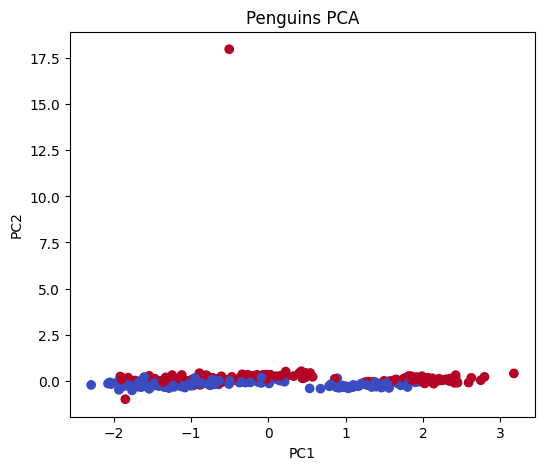

In [47]:
# <your code here>
pca2 = PCA(n_components=2)
x_penguins_pca = pca2.fit_transform(x_penguins)

plt.figure(figsize=(6, 5))
plt.scatter(x_penguins_pca[:, 0], x_penguins_pca[:, 1],
            c=(y_penguins == "MALE").astype(int), cmap="coolwarm")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Penguins PCA")
plt.show()

#### 17. Display scree plots to determine the optimal number of components and cumulative explained variance

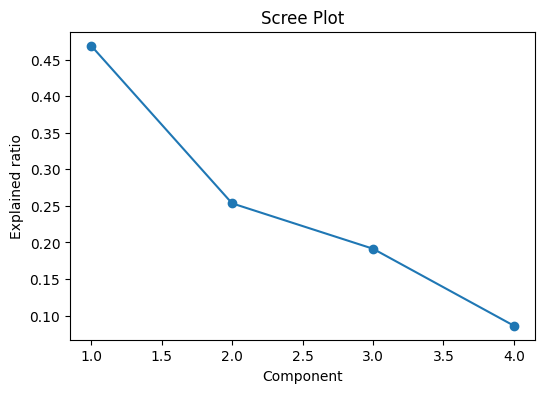

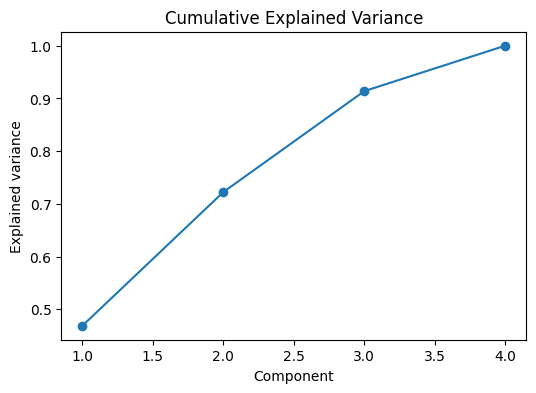

In [49]:
# <your code here>
pca_full = PCA()
pca_full.fit(x_penguins)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained) + 1), explained, marker="o")
plt.xlabel("Component")
plt.ylabel("Explained ratio")
plt.title("Scree Plot")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cum_explained) + 1), cum_explained, marker="o")
plt.xlabel("Component")
plt.ylabel("Explained variance")
plt.title("Cumulative Explained Variance")
plt.show()

#### 18. Calculate (show in numbers) and display component loadings

In [50]:
# Component loadings (how much each original feature contributes to each PC)
# <your code here>
loadings = pd.DataFrame(
    pca2.components_.T,
    columns=["PC1", "PC2"],
    index=num_cols
)
loadings

,PC1,PC2
culmen_length_mm,0.570241,0.085418
culmen_depth_mm,-0.498432,0.205828
flipper_length_mm,0.023794,0.973716
body_mass_g,0.652552,0.047068


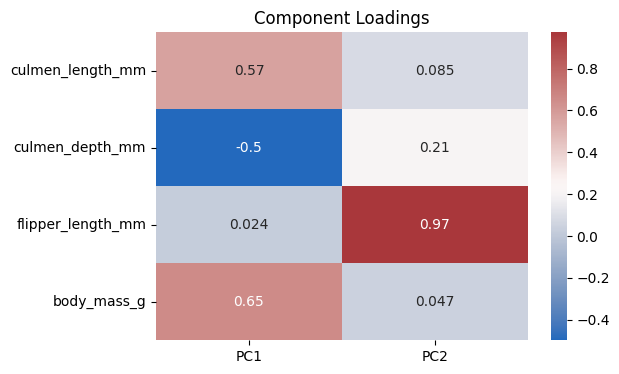

In [51]:
# show heatmap
# <your code here>
plt.figure(figsize=(6, 4))
sns.heatmap(loadings, annot=True, cmap="vlag")
plt.title("Component Loadings")
plt.show()

#### 19. Perform logistic regression (or any other classification algorithm) and evaluate the model

In [53]:
# import necessary libraries for model training and evaluation
# Use the PCA-transformed data (X_penguins_pca) and true labels (y_penguins)
# Train and evaluate a model
# <your code here>
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode labels: MALE=1, FEMALE=0
y_enc = (y_penguins == "MALE").astype(int)

x_train, x_test, y_train, y_test = train_test_split(
    x_penguins_pca, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8059701492537313
[[25  8]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.78      0.85      0.82        34

    accuracy                           0.81        67
   macro avg       0.81      0.81      0.81        67
weighted avg       0.81      0.81      0.81        67



#### 20. Train the model on all data points, and determine penguin sex for the data, where it was not originally identified

In [54]:
# 1. take entries from original data without sex, scale numerical columns
# <your code here>
penguins_unknown = penguins_clean[penguins_clean["sex"].isna()]
penguins_unknown = penguins_unknown.dropna(subset=num_cols)

x_unknown = scaler_penguins.transform(penguins_unknown[num_cols])


In [55]:
# 2. apply the same PCA transformation to the new data
# <your code here>
x_unknown_pca = pca2.transform(x_unknown)

In [56]:
# 3. Train the model
# Define X_train and y_train using all PCA data from valid data
# <your code here>
x_train_all = x_penguins_pca
y_train_all = (y_penguins == "MALE").astype(int)

# Train a classifier
# <your code here>
clf_all = LogisticRegression()
clf_all.fit(x_train_all, y_train_all)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [57]:
# 4. Make predictions on the new data. Display the features and predicted values
# <your code here>
pred_unknown = clf_all.predict(x_unknown_pca)
pred_label = np.where(pred_unknown == 1, "MALE", "FEMALE")

result = penguins_unknown[num_cols].copy()
result["predicted_sex"] = pred_label
result.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,predicted_sex
8,34.1,18.1,193.0,3475.0,FEMALE
10,37.8,17.1,186.0,3300.0,FEMALE
11,37.8,17.3,180.0,3700.0,FEMALE
47,37.5,18.9,179.0,2975.0,FEMALE
246,44.5,14.3,216.0,4100.0,FEMALE
